# Load Libraries Data

In [264]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from scipy.cluster.hierarchy import dendrogram, linkage

In [265]:
dataset = pd.read_csv("https://raw.githubusercontent.com/brandonndun/DataMining_ALP/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv")
dataset

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


# EDA

`dataset.info()` ***Mencari tau informasi dasar mengenai data yang akan dipergunakan***

In [266]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


`dataset.duplicated().sum()` ***Proses check data apakah ada yang duplikat atau tidak***

In [267]:
dataset.duplicated().sum()

0

`dataset.isnull().sum()` ***Proses check data apakah terdapat Missing Value atau tidak***

In [268]:
dataset.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

`dataset.dtypes` ***Proses check tipe data yang digunakan***

In [269]:
dataset.dtypes

gender                   int64
age                      int64
Time                   float64
Number_of_Warts        float64
Type                   float64
Area                     int64
induration_diameter    float64
Result_of_Treatment      int64
dtype: object

# Preperation Data

**RENAME COLUMNS**

***Sebagai mempermudah pengerjaan, disini ada sedikit perubahan nama kolom yaitu :***
1. gender -> Gender
2. age -> Age
3. induration_diameter -> Induration_Diameter

In [270]:
dataset = dataset.rename(columns={'gender': 'Gender', 'age': 'Age','induration_diameter' : 'Induration_Diameter'})
dataset.head()

,Gender,Age,Time,Number_of_Warts,Type,Area,Induration_Diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


# Fill Missing Value `Time` and `Induration Diameter` with Fillna() -> Mean

*Metode Fillna () dengan menggunakan MEAN disini berfungsi sebagai pengganti nilai `Missing Value` dengan nilai yang sudah di rata-rata di kolom deret, sehingga menghasilkan nilai rata rata yang telah dihitung dari nilai kolom deret itu sendiri.*

In [271]:
dataset["Time"].fillna(math.floor(dataset["Time"].mean()), inplace=True)
dataset["Induration_Diameter"].fillna(math.floor(dataset["Induration_Diameter"].mean()), inplace=True)

# Fill Missing Value `Number_of_Warts`  With Linear Regression

*Untuk mengisi missing values dari `Number_of_Warts` dapat menggunakan metode Linear Regresi dikarenakan bertipe data `Angka` , untuk library yang digunakan yaitu `LinearRegression` dari `sklearn` untuk melakukan regresinya.*

In [272]:
lr = LinearRegression()

test_dataset = dataset[dataset['Number_of_Warts'].isnull()==True]
train_dataset = dataset[dataset['Number_of_Warts'].isnull()==False]

y = train_dataset['Number_of_Warts']
train_dataset.drop("Number_of_Warts",axis=1,inplace=True)
train_dataset.drop("Type",axis=1,inplace=True)
test_dataset.drop("Number_of_Warts",axis=1,inplace=True)
test_dataset.drop("Type",axis=1,inplace=True)

lr.fit(train_dataset,y)
pred = lr.predict(test_dataset)

test_dataset['Number_of_Warts'] = pred
train_dataset['Number_of_Warts'] = y

dataset_new = test_dataset.append(train_dataset)
dataset_new["Type"] = dataset["Type"]


C:\Users\I Putu Brandon Bagus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\IPUTUB~1\AppData\Local\Temp/ipykernel_6560/897035900.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['Number_of_Warts'] = pred
C:\Users\IPUTUB~1\AppData\Local\Temp/ipykernel_6560/897035900.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

# Fill Missing Value `Type`  With KNeighborsClassifier

*Untuk mengisi missing values dari `Type` dapat menggunakan metode KNeighborsClassifier dikarenakan data tersebut bertipe `Kategorikal`, untuk library yang digunakan yaitu `KNeighborsClassfier` dari `sklearn` untuk melakukan regresinya.*


In [273]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")

test_dataset = dataset_new[dataset_new['Type'].isnull()==True]
train_dataset = dataset_new[dataset_new['Type'].isnull()==False]

y = train_dataset['Type']
train_dataset.drop("Type",axis=1,inplace=True)
test_dataset.drop("Type",axis=1,inplace=True)

knn.fit(train_dataset,y)
pred = knn.predict(test_dataset)

test_dataset['Type'] = pred
train_dataset['Type'] = y

dataset_new1 = test_dataset.append(train_dataset)

C:\Users\I Putu Brandon Bagus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\IPUTUB~1\AppData\Local\Temp/ipykernel_6560/148780488.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['Type'] = pred
C:\Users\IPUTUB~1\AppData\Local\Temp/ipykernel_6560/148780488.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

# Checking Missing Value

*Terlihat bahwa tidak ada lagi Missing Value di kolom dataset disini. Kita bisa langsung menuju normalisasi untuk meng-handle imbalance data yang ada disini*

In [274]:
dataset_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 10 to 88
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               90 non-null     int64  
 1   Age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Area                 90 non-null     int64  
 4   Induration_Diameter  90 non-null     float64
 5   Result_of_Treatment  90 non-null     int64  
 6   Number_of_Warts      90 non-null     float64
 7   Type                 90 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 6.3 KB


In [275]:
dataset_new1.isnull().sum()

Gender                 0
Age                    0
Time                   0
Area                   0
Induration_Diameter    0
Result_of_Treatment    0
Number_of_Warts        0
Type                   0
dtype: int64

# Proses Balanced Data

`dataset['Result_of_Treatment'].value_counts()` ***Proses check Imbalance Data***

In [276]:
dataset_new1['Result_of_Treatment'].value_counts()

1    71
0    19
Name: Result_of_Treatment, dtype: int64

*Dari hasil diatas, dapat disimpulkan bahwa data mempunyai selisih yang cukup jauh, apabila tidak diseimbangkan dapat terjadi data yang bias, dan hal tersebut akan berpengaruh buruk untuk analisis data.Untuk mengatasi data yang tidak seimbang, dapat menggunakan teknik Oversampling (SMOTE) yang bertujuan untuk Meng-Balanced kan data tersebut*

In [277]:
X = dataset_new1.drop(["Result_of_Treatment"], axis=1)
y = dataset_new1["Result_of_Treatment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [278]:
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

X_train_new['Result_of_Treatment'] = y_train_new

dataset_new1 = X_train_new
dataset_new1['Result_of_Treatment'].value_counts()

0    63
1    63
Name: Result_of_Treatment, dtype: int64

# Normalisasi

In [279]:
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(dataset_new1)

print(normalized_data)

[[0.         0.29268293 0.97727273 ... 0.25268184 0.         0.        ]
 [1.         0.43902439 0.63636364 ... 0.11111111 0.         1.        ]
 [1.         0.17073171 0.65909091 ... 0.44444444 0.         1.        ]
 ...
 [1.         0.36585366 0.960026   ... 0.27777778 0.70685734 0.        ]
 [0.         0.31707317 0.73091561 ... 0.27453782 0.13549642 0.        ]
 [0.         0.85365854 0.46893545 ... 0.11909157 0.         0.        ]]


# Clustering

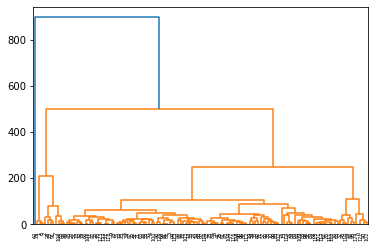

In [280]:
dendrogram(linkage(dataset_new1,method='complete'))
plt.show()

In [281]:
ac = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
labels = ac.fit_predict(dataset_new1)
dataset_new1 = pd.DataFrame(dataset_new1)
dataset_new1['Labels'] = labels
dataset_new1['Labels'].value_counts()

1    103
0     11
2      8
4      3
3      1
Name: Labels, dtype: int64

***Dapat dilihat hasil diatas bahwa, didapatkan 5 kelompok dengan masing-masing anggota :***
1. Kelompok 1 : 103
2. Kelompok 0 : 11
3. Kelompok 8 : 8
4. Kelompok 3 : 3
5. Kelompok 3 : 1